# Investigacion corta 2
Aprendizaje automatico supervisado

Leonardo Araya Martinez - 2013389556

## Aprendizaje supervisado con kNN

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

Cargar el set de datos a utilizar

In [2]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diabetes.shape

(768, 9)

Mostrar parte de la informacion del set de datos

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Utilizar solamente algunas columnas de interes

In [4]:
cols_to_use = ['Glucose','BloodPressure','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes = diabetes[cols_to_use]
diabetes.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1


Remover las filas vacias

In [5]:
diabetes = diabetes.dropna()
diabetes.shape

(768, 6)

Generar los datos de entrada y de salida del algoritmo de aprendizaje

In [6]:
features = diabetes[['Glucose','BloodPressure','BMI', 'Age', 'DiabetesPedigreeFunction']]
labels = diabetes['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13, test_size=0.2)

Generacion del algoritmo kNN

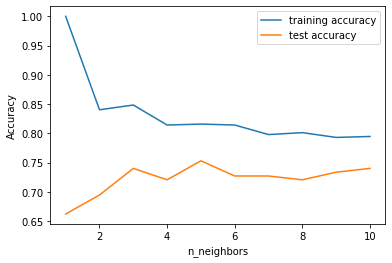

In [8]:
training_accuracy = []
test_accuracy = []

import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))

    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Resultados
Notese que el accuracy de este metodo es de aproximadamente 75%, el cual puede ser considerado bajo.
Esto puede deberse, entre otras cosas, a que el modelo de kNN no trabaja bien cuando la cantidad de features
es alta o cuando muchos de ellos son cero. En este caso, estamos utilizando 6 features para predecir la salida.

## Aprendizaje supervisado con regresion lineal

In [9]:
from sklearn.linear_model import LinearRegression

Cargar los datos nuevamente

In [25]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
features = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
labels = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=13, test_size=0.2)

Generar la regresion lineal y mostrar los valores de score

In [52]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.30
Test set score: 0.30


### Resultados
Los valores de score para el training y el test son muy bajos en comparacion con el metodo anterior. Esto puede deberse a que por la naturaleza del algoritmo lineal, este no logra determinar bien la salida a partir de los datos de entrada. Se intento con diferentes combinaciones de features, y ninguno de ellos logro mejores resultados.

## Aprendizaje supervisado con regresion lineal

In [55]:
from sklearn.linear_model import LogisticRegression

Cargar los datos nuevamente y definir los features

In [56]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
features = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
labels = diabetes['Outcome']

Generar el algoritmo e imprimir los resultados

In [57]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13, test_size=0.2)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.780
Test set score: 0.753


### Resultados
